In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Any dataset that has columns with values as 'Yes' or 'No', strings' values cannot be used.
# However, we can convert them to numerical values as binary.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
X = housing.values[:,1:12]
print('X =', X[0:5])
Y = housing.values[:,0]
print('Y =', Y[0:5])

X = [[7420 4 2 3 1 0 0 0 1 2 1]
 [8960 4 4 4 1 0 0 0 1 3 0]
 [9960 3 2 2 1 0 1 0 0 2 1]
 [7500 4 2 2 1 0 1 0 1 3 1]
 [7420 4 1 2 1 1 1 0 1 2 0]]
Y = [13300000 12250000 12250000 12215000 11410000]


In [5]:
# Implementation SVR Regression (Linear Kernel) over the numbers of principal components from PCA extraction scaling. 

Prin_Comp = []
Accuracy_lin = []
max_accuracy_lin = 0 
max_comp_lin = 0

N_Comp = range(1,11)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model_lin = SVR(kernel = 'linear', C = 1e6)
    model_lin.fit(X_train_sc,Y_train)
    Y_pred_lin = model_lin.predict(X_test_sc)
    Accuracy_lin.append(model_lin.score(X_test_sc, Y_test))
    if model_lin.score(X_test_sc, Y_test) > max_accuracy_lin:
        max_comp_lin = N
        max_accuracy_lin = model_lin.score(X_test_sc, Y_test)
print("The N of principal components with the highest accuracy is:", max_comp_lin, "components with the accuracy of", max_accuracy_lin)

The N of principal components with the highest accuracy is: 8 components with the accuracy of 0.6881920717759442


In [6]:
# Implementation SVR Regression (Polynomial Kernel) over the numbers of principal components from PCA extraction scaling. 

Prin_Comp = []
Accuracy_poly = []
max_accuracy_poly = 0 
max_comp_poly = 0

N_Comp = range(1,11)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model_poly = SVR(kernel = 'poly', C = 1e5)
    model_poly.fit(X_train_sc,Y_train)
    Y_pred_poly = model_poly.predict(X_test_sc)
    Accuracy_poly.append(model_poly.score(X_test_sc, Y_test))
    if model_poly.score(X_test_sc, Y_test) > max_accuracy_poly:
        max_comp_poly = N
        max_accuracy_poly = model_poly.score(X_test_sc, Y_test)
print("The N of principal components with the highest accuracy is:", max_comp_poly, "components with the accuracy of", max_accuracy_poly)

The N of principal components with the highest accuracy is: 5 components with the accuracy of 0.5354556738266569


In [7]:
# Implementation SVR Regression (Radial Basis Function Kernel) over the numbers of principal components from PCA extraction scaling. 

Prin_Comp = []
Accuracy_rbf = []
max_accuracy_rbf = 0 
max_comp_rbf = 0

N_Comp = range(1,11)
for N in N_Comp:
    Prin_Comp.append(N)
    pca = PCA(n_components = N)
    principalComponents = pca.fit_transform(X)
    principalDF = pd.DataFrame(data = principalComponents)
    X_train, X_test, Y_train, Y_test = train_test_split(principalDF, Y, test_size=0.2, random_state = 0)
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model_rbf = SVR(kernel = 'rbf', C = 1e6)
    model_rbf.fit(X_train_sc,Y_train)
    Y_pred_rbf = model_rbf.predict(X_test_sc)
    Accuracy_rbf.append(model_rbf.score(X_test_sc, Y_test))
    if model_rbf.score(X_test_sc, Y_test) > max_accuracy_rbf:
        max_comp_rbf = N
        max_accuracy_rbf = model_rbf.score(X_test_sc, Y_test)
print("The N of principal components with the highest accuracy is:", max_comp_rbf, "components with the accuracy of", max_accuracy_rbf)

The N of principal components with the highest accuracy is: 10 components with the accuracy of 0.5834690324496695


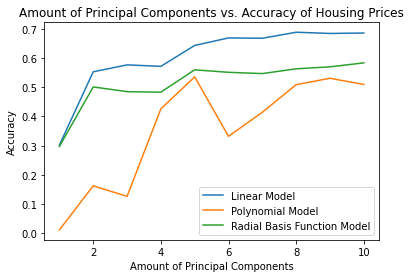

In [8]:
plt.plot(Prin_Comp, Accuracy_lin, label = 'Linear Model')
plt.plot(Prin_Comp, Accuracy_poly, label = 'Polynomial Model')
plt.plot(Prin_Comp, Accuracy_rbf, label = 'Radial Basis Function Model')
plt.xlabel("Amount of Principal Components")
plt.ylabel("Accuracy")
plt.title("Amount of Principal Components vs. Accuracy of Housing Prices")
plt.legend()
plt.show()